In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [46]:
weather_data_df= pd.DataFrame(cities)
weather_data_df = weather_data_df.rename(columns = {0:'City'})
weather_data_df['City'] = weather_data_df['City'].str.capitalize()
weather_data_df['Country']=''
weather_data_df['Latitude'] = ''
weather_data_df['Longitude'] = ''
weather_data_df['Date']=''
weather_data_df['Humidity']=''
weather_data_df['Max Temperature']=''
weather_data_df['Cloudiness']=''
weather_data_df['Wind Speed']=''
weather_data_df.head()


,City,Country,Latitude,Longitude,Date,Humidity,Max Temperature,Cloudiness,Wind Speed
0,Mataura,,,,,,,,
1,Avarua,,,,,,,,
2,Udimskiy,,,,,,,,
3,Cayenne,,,,,,,,
4,Poum,,,,,,,,


In [45]:
city = 'touros'
base_url = "http://api.openweathermap.org/data/2.5/weather?"
target_url = f"{base_url}appid={api_key}&q={city}"
weather_response = requests.get(target_url).json()

weather_response_json = json.dumps(weather_response, indent=4)
weather_response

{'coord': {'lon': -35.46, 'lat': -5.2},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 300.15,
  'pressure': 1015,
  'humidity': 78,
  'temp_min': 300.15,
  'temp_max': 300.15},
 'visibility': 10000,
 'wind': {'speed': 5.7, 'deg': 170, 'gust': 10.8},
 'clouds': {'all': 40},
 'dt': 1563558582,
 'sys': {'type': 1,
  'id': 8452,
  'message': 0.0079,
  'country': 'BR',
  'sunrise': 1563525138,
  'sunset': 1563567812},
 'timezone': -10800,
 'id': 3386213,
 'name': 'Touros',
 'cod': 200}

In [47]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"


#add counter to add sleep function
#enumerate function
# for i,j in enumerate(list) --> [(0,list_element)]
#if i = 50: ---> time.sleep()

counter=0
set = 0
for index,row in weather_data_df.iterrows():

    if (counter % 50==0):
        set += 1
        time.sleep(1)
        counter =1
        
    else:
        counter += 1
        
    city = weather_data_df['City'][index]
    target_url = f"{base_url}appid={api_key}&q={city}"
    weather_response = requests.get(target_url).json()
    try:
        print(f"Processing Record {counter} of Set {set} | {city}")
        weather_data_df.loc[index, 'Country'] = weather_response['sys']['country']
        weather_data_df.loc[index, 'Latitude'] = weather_response['coord']['lat']
        weather_data_df.loc[index, 'Longitude'] = weather_response['coord']['lon']
        weather_data_df.loc[index, 'Date'] = weather_response['dt']           
        weather_data_df.loc[index, 'Humidity'] = weather_response['main']['humidity']
        weather_data_df.loc[index, 'Max Temperature'] = weather_response['main']['temp_max']
        weather_data_df.loc[index, 'Cloudiness'] = weather_response['clouds']['all']
        weather_data_df.loc[index, 'Wind Speed'] = weather_response['wind']['speed']

    except KeyError:
        print('Information not found...Skipping')




    



    

Processing Record 1 of Set 1 | Mataura
Processing Record 2 of Set 1 | Avarua
Processing Record 3 of Set 1 | Udimskiy
Processing Record 4 of Set 1 | Cayenne
Processing Record 5 of Set 1 | Poum
Processing Record 6 of Set 1 | Arraial do cabo
Processing Record 7 of Set 1 | Kapaa
Processing Record 8 of Set 1 | Georgetown
Processing Record 9 of Set 1 | Hare bay
Processing Record 10 of Set 1 | Katsina
Processing Record 11 of Set 1 | Mantua
Processing Record 12 of Set 1 | Kaitangata
Processing Record 13 of Set 1 | Chapais
Processing Record 14 of Set 1 | Valle de allende
Processing Record 15 of Set 1 | Miharu
Processing Record 16 of Set 1 | Saint-pierre
Processing Record 17 of Set 1 | Ushuaia
Processing Record 18 of Set 1 | Rikitea
Processing Record 19 of Set 1 | Port alfred
Processing Record 20 of Set 1 | Hilo
Processing Record 21 of Set 1 | Muncar
Processing Record 22 of Set 1 | Chuy
Processing Record 23 of Set 1 | Vila franca do campo
Processing Record 24 of Set 1 | Lugovoy
Processing Record

Processing Record 39 of Set 4 | Hajnowka
Processing Record 40 of Set 4 | Namibe
Processing Record 41 of Set 4 | Yumen
Processing Record 42 of Set 4 | Ruteng
Processing Record 43 of Set 4 | Katsuura
Processing Record 44 of Set 4 | Nouakchott
Processing Record 45 of Set 4 | Feijo
Processing Record 46 of Set 4 | Pevek
Processing Record 47 of Set 4 | San juan de los morros
Processing Record 48 of Set 4 | Diu
Processing Record 49 of Set 4 | Luwuk
Processing Record 50 of Set 4 | Villa carlos paz
Processing Record 1 of Set 5 | Russell
Processing Record 2 of Set 5 | Bambous virieux
Processing Record 3 of Set 5 | Kushima
Processing Record 4 of Set 5 | Bereznik
Processing Record 5 of Set 5 | Novobiryusinskiy
Processing Record 6 of Set 5 | Horsham
Processing Record 7 of Set 5 | Mabaruma
Processing Record 8 of Set 5 | Cherskiy
Processing Record 9 of Set 5 | Kavieng
Processing Record 10 of Set 5 | Paoua
Processing Record 11 of Set 5 | Semibratovo
Processing Record 12 of Set 5 | Calama
Processing Re

Processing Record 25 of Set 8 | Husavik
Processing Record 26 of Set 8 | Reconquista
Processing Record 27 of Set 8 | Shenjiamen
Processing Record 28 of Set 8 | Polovinnoye
Processing Record 29 of Set 8 | Naron
Processing Record 30 of Set 8 | Vilyuysk
Processing Record 31 of Set 8 | Attawapiskat
Information not found...Skipping
Processing Record 32 of Set 8 | Areni
Processing Record 33 of Set 8 | Irupi
Processing Record 34 of Set 8 | Hofn
Processing Record 35 of Set 8 | Klamath falls
Processing Record 36 of Set 8 | Kuminskiy
Processing Record 37 of Set 8 | Progreso
Processing Record 38 of Set 8 | Grindavik
Processing Record 39 of Set 8 | Dingle
Processing Record 40 of Set 8 | Sembakung
Processing Record 41 of Set 8 | Menongue
Processing Record 42 of Set 8 | Banjar
Processing Record 43 of Set 8 | Comodoro rivadavia
Processing Record 44 of Set 8 | Nalut
Processing Record 45 of Set 8 | Kentau
Processing Record 46 of Set 8 | Malyye derbety
Processing Record 47 of Set 8 | Ponta delgada
Proces

Processing Record 12 of Set 12 | Mayya
Processing Record 13 of Set 12 | Ajaccio
Processing Record 14 of Set 12 | Manitouwadge
Processing Record 15 of Set 12 | Tura
Processing Record 16 of Set 12 | Pirovskoye
Processing Record 17 of Set 12 | Broome
Processing Record 18 of Set 12 | Jingdezhen
Processing Record 19 of Set 12 | Sur
Processing Record 20 of Set 12 | Bjala
Information not found...Skipping
Processing Record 21 of Set 12 | Tello
Processing Record 22 of Set 12 | Kudahuvadhoo
Processing Record 23 of Set 12 | Lazarev
Processing Record 24 of Set 12 | Broken hill
Processing Record 25 of Set 12 | Dagda
Processing Record 26 of Set 12 | Calvia
Processing Record 27 of Set 12 | Kuche
Information not found...Skipping
Processing Record 28 of Set 12 | Hit
Processing Record 29 of Set 12 | Zatoka
Processing Record 30 of Set 12 | Kaoma
Processing Record 31 of Set 12 | Autazes
Processing Record 32 of Set 12 | Sioux lookout
Processing Record 33 of Set 12 | Dunedin
Processing Record 34 of Set 12 |

In [48]:
weather_data_df.to_csv('weather_data')
weather_data_df.head()

,City,Country,Latitude,Longitude,Date,Humidity,Max Temperature,Cloudiness,Wind Speed
0,Mataura,NZ,-46.19,168.86,1563558809,97,280.37,100,0.45
1,Avarua,CK,-21.21,-159.78,1563558809,100,292.15,2,1
2,Udimskiy,RU,61.14,45.92,1563558809,64,290.846,57,2.21
3,Cayenne,GF,4.94,-52.33,1563558809,66,304.15,5,1
4,Poum,MK,41.28,20.71,1563558809,53,295.15,20,2.1


In [49]:
number_columns = ['Latitude', 'Longitude', 'Date', 'Humidity', 'Max Temperature', 'Wind Speed']
for column in number_columns:
    weather_data_df[column] = pd.to_numeric(weather_data_df[column])
weather_data_df.dtypes

City                object
Country             object
Latitude           float64
Longitude          float64
Date               float64
Humidity           float64
Max Temperature    float64
Cloudiness          object
Wind Speed         float64
dtype: object

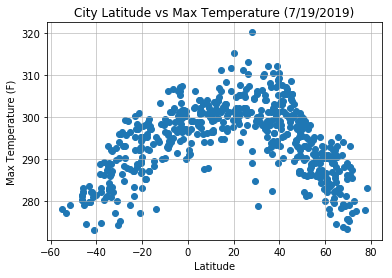

In [50]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Max Temperature'], marker = 'o')
grid = plt.grid(which = 'major', axis = 'both', alpha = 0.75)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (7/19/2019)')

plt.savefig('Plots/latitude_temperature')

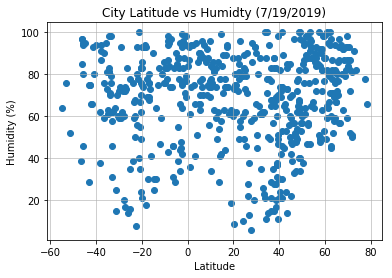

In [51]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Humidity'])

grid = plt.grid(which = 'major', axis='both', alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidty (7/19/2019)')

plt.savefig('Plots/latitude_humidity')

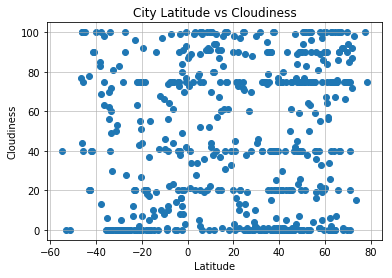

In [53]:
grid = plt.grid(which = 'major', axis = 'both', alpha = 0.75)

plt.scatter(weather_data_df['Latitude'], weather_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (7/19/2019)')
            
plt.savefig('Plots/latitude_cloudiness')

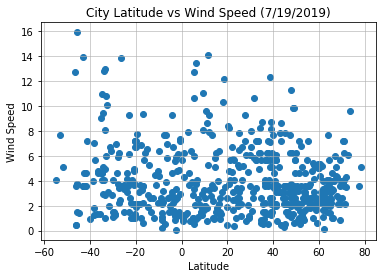

In [54]:
grid = plt.grid(which = 'major', axis = 'both', alpha = 0.75)

plt.scatter(weather_data_df['Latitude'], weather_data_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (7/19/2019)')

plt.savefig('Plots/latitude_windspeed')

1) The randomized data clearly shows that as you approach the equator and 0 latitude, the max temperature increases. 

2) Humidity also increases as latitude approaches the equator. However, this relationshiop is less direct as humidity is multifactorial (i.e proximity to water)

3) Wind speed and cloudiness don't seem to bear a relation to the equator.